In [252]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [178]:
df = pd.read_csv('../input/productivity-prediction-of-garment-employees/garments_worker_productivity.csv')
df.shape

(1197, 15)

In [179]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [180]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [181]:
df['date'].dtype == 'object'

True

# **Changing date column type to datetime64**

In [182]:
df['date'] = pd.to_datetime(df['date'])

In [183]:
df['date'].dtype

dtype('<M8[ns]')

In [184]:
#Setting date column as index
df.set_index('date', inplace=True)

In [185]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# **Filling WIP NaN values using interpolate(time) method**

In [186]:
df['wip'].interpolate(method='time',inplace=True)

In [187]:
df[['wip']].head()

,wip
date,
2015-01-01,1108.0
2015-01-01,795.0
2015-01-01,968.0
2015-01-01,968.0
2015-01-01,1170.0


In [188]:
df['wip'].isna().sum()

0

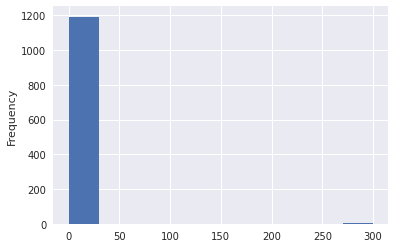

In [189]:
df['idle_time'].plot(kind='hist')
plt.show()

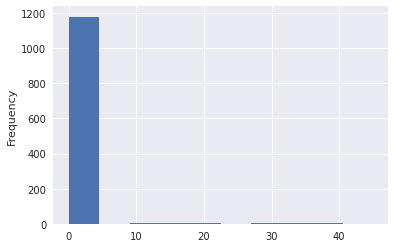

In [190]:
df['idle_men'].plot(kind='hist')
plt.show()

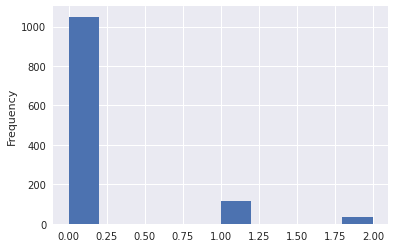

In [191]:
df['no_of_style_change'].plot(kind='hist')
plt.show()

# **Dropping 'idle_men', 'idle_time' and 'no_of_style_change' columns because high frequency in 0 values**

In [192]:
df.drop(['idle_men', 'idle_time','no_of_style_change'], axis=1,inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
date,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,795.0,960,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382


In [193]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [194]:
df['department'] = df['department'].str.replace(' ','')
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

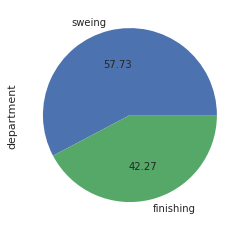

In [195]:
df['department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

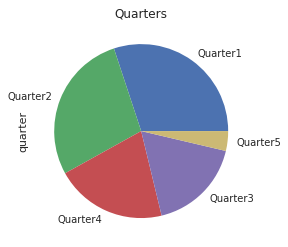

In [196]:
plt.title("Quarters")
df['quarter'].value_counts().plot(kind='pie')
plt.show()

In [197]:
quarters = df['quarter'].unique()

# **Department in each Quarter**

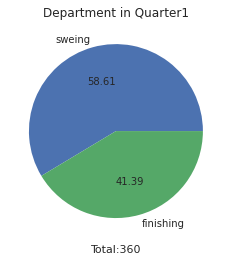

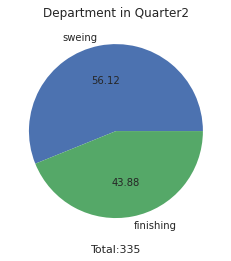

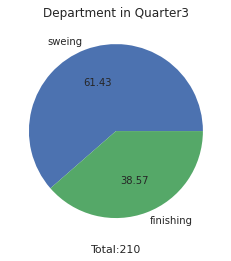

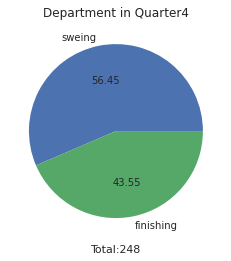

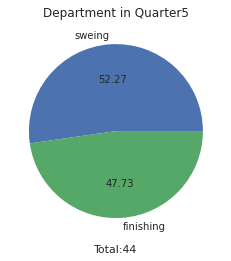

In [198]:
for quarter in quarters:
    qcounter = df['department'][df['quarter'] == quarter].value_counts()
    plt.pie(qcounter, autopct="%.2f", labels=qcounter.keys())
    plt.title(f"Department in {quarter}")
    plt.xlabel(f"Total:{sum(qcounter)}")
    plt.show()
    print("\n")

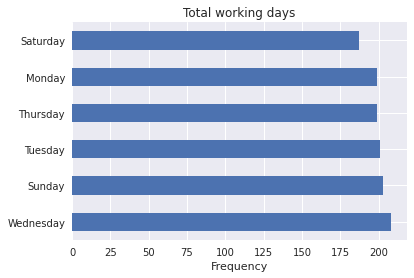

In [199]:
df['day'].value_counts().plot(kind='barh')
plt.title("Total working days")
plt.xlabel('Frequency')
plt.show()

# **Work In Progress(WIP) on week days**

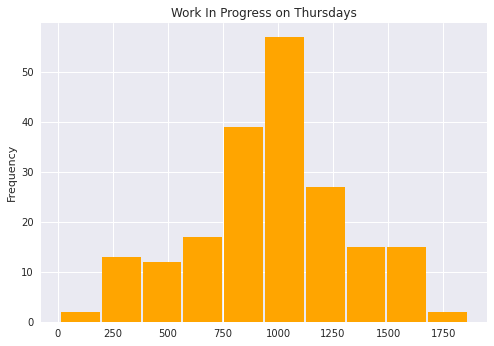

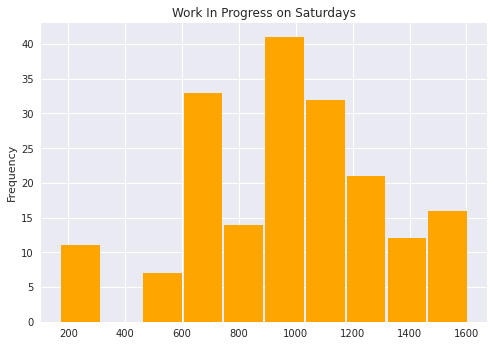

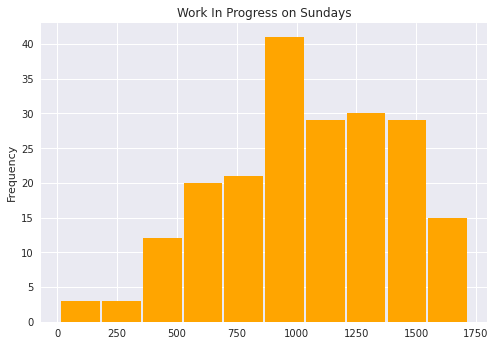

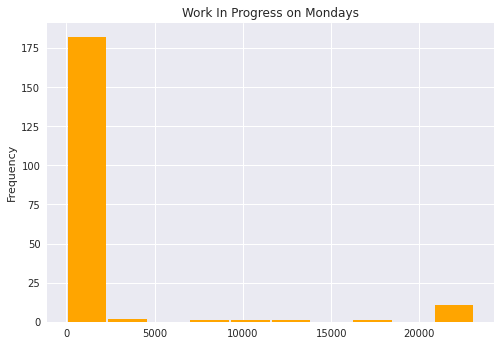

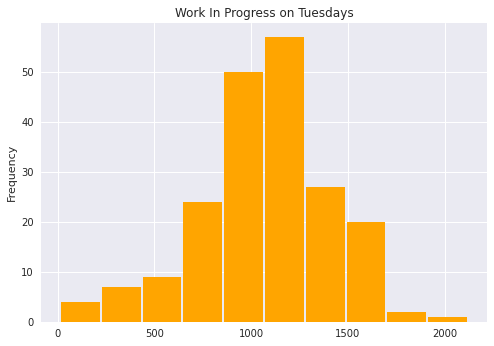

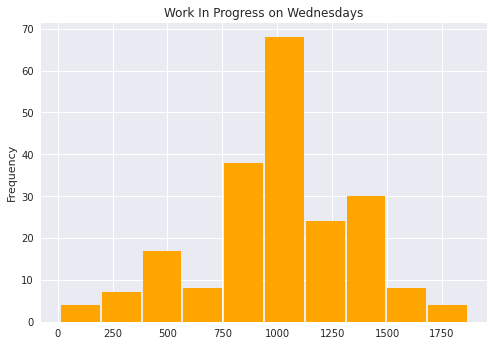

In [200]:
days = df['day'].unique()
for day in days:
    plt.style.use('seaborn')
    plt.title(f"Work In Progress on {day}s")
    wip_day = df['wip'][df['day'] == day]
    wip_day.plot(kind="hist", rwidth=0.95, color='orange')
    plt.show()
    

# **Targeted productivity vs Actual productivity**

In [201]:
t_vs_a = ['targeted_productivity', 'actual_productivity']
df[t_vs_a].describe()

,targeted_productivity,actual_productivity
count,1197.000000,1197.000000
mean,0.729632,0.735091
std,0.097891,0.174488
min,0.070000,0.233705
25%,0.700000,0.650307
50%,0.750000,0.773333
75%,0.800000,0.850253
max,0.800000,1.120437


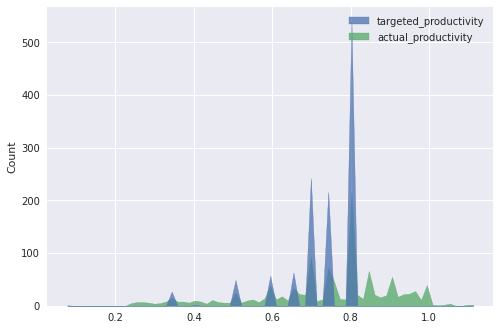

In [202]:
sns.histplot(data=df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

# **Analysis on incentives**

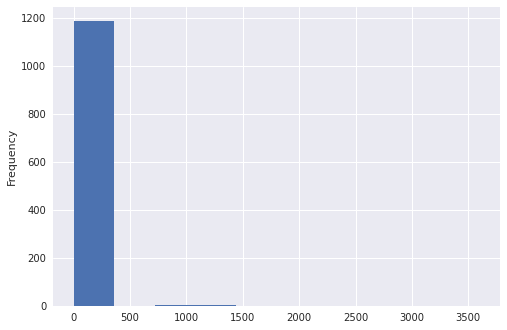

In [203]:
df['incentive'].plot(kind='hist')
plt.show()

# **Incentives > 0**

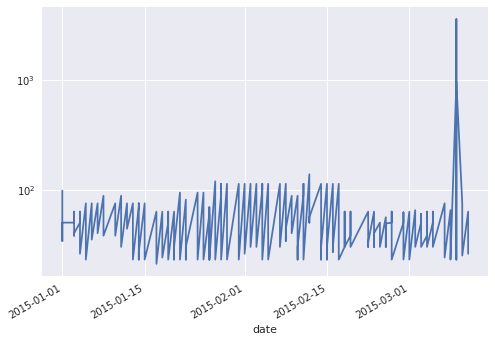

In [204]:
df['incentive'][df['incentive']>0].plot(kind='line')
plt.yscale('log')
plt.show()

# **Incentives per Quarter**

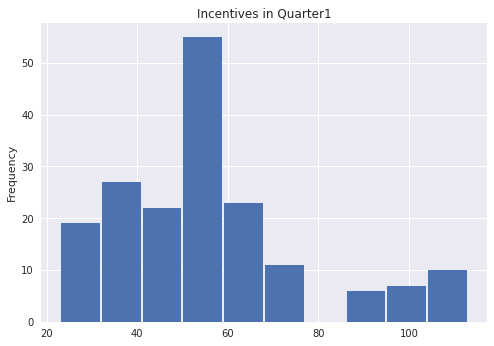

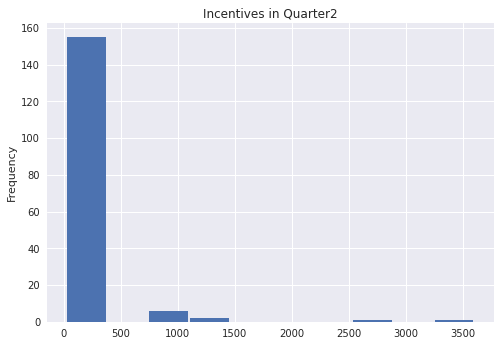

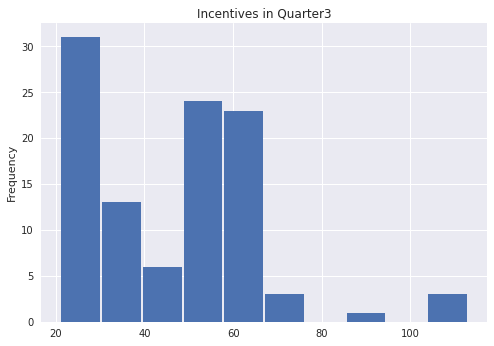

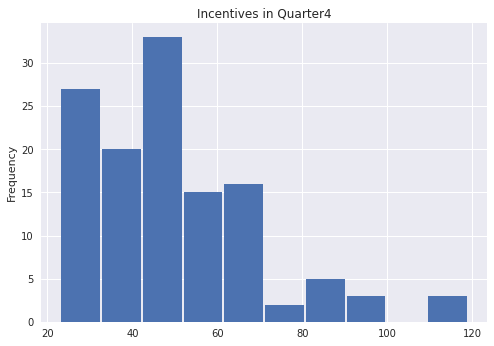

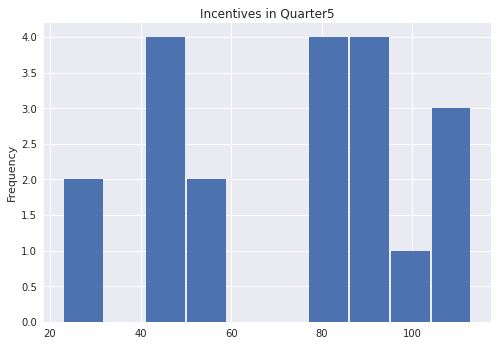

In [205]:
for quarter in quarters:
    plt.title(f"Incentives in {quarter}")
    df['incentive'][(df['quarter'] == quarter) & (df['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

# **Incentives per weekdays**

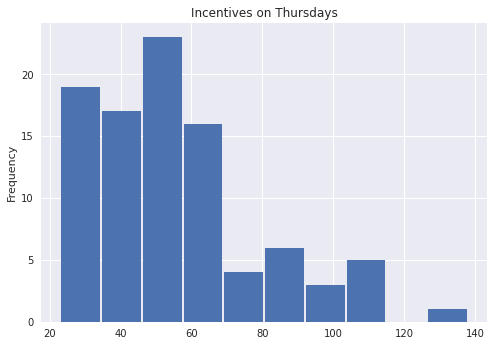

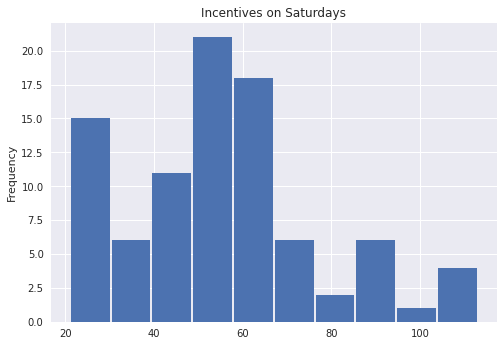

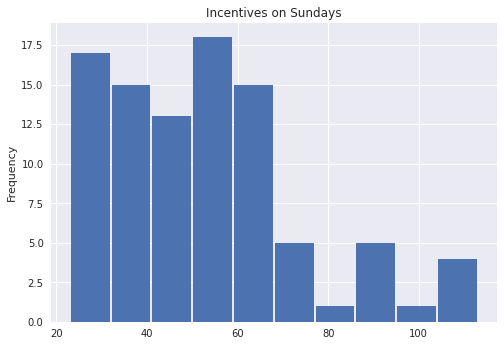

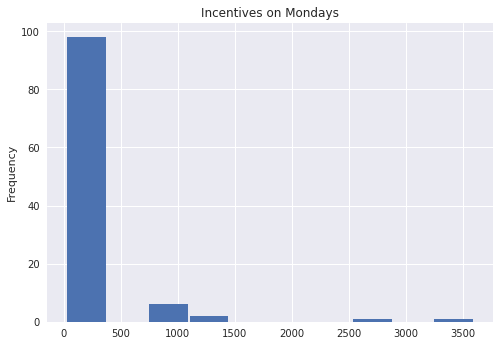

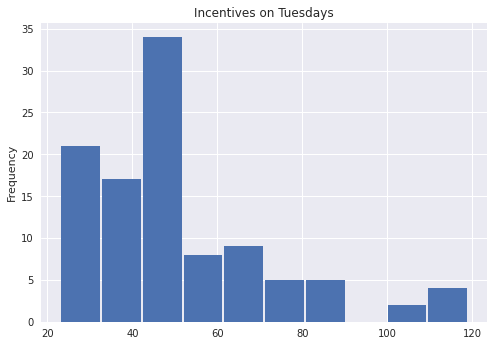

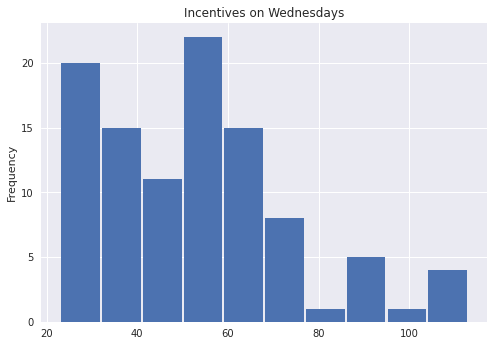

In [206]:
for day in days:
    plt.title(f"Incentives on {day}s")
    df['incentive'][(df['day'] == day) & (df['incentive']>0)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

# **Incentives for sweing vs Incentives for finishing**

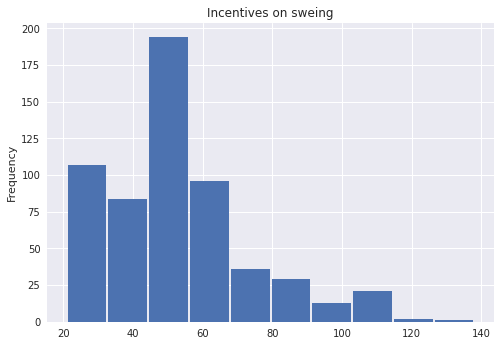

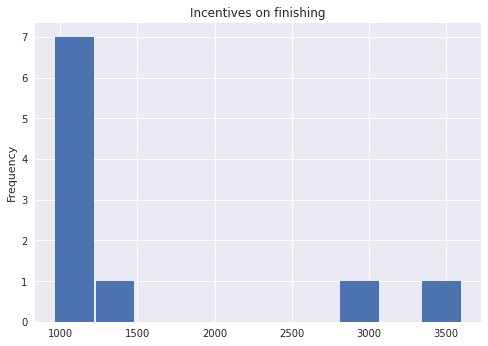

In [207]:
depts = df['department'].unique()
for dept in depts:
    plt.title(f"Incentives on {dept}")
    df['incentive'][(df['department'] == dept) & (df['incentive']>1)].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')    

# **As a result Finishing department gets high icentives than Sweing department**

# **Team and Over time**

In [208]:
x_axis = df['team'].unique()

In [209]:
y_axis=[]
for val in x_axis:
    y_axis.append(df['over_time'][df['team'] == val].mean())

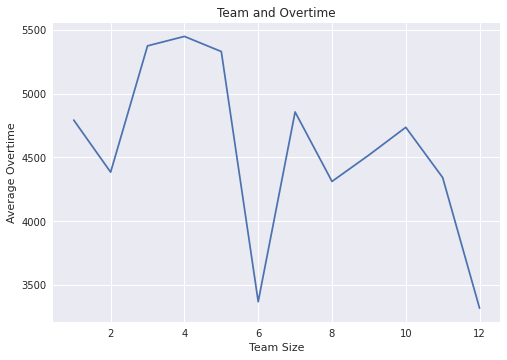

In [210]:
sns.lineplot(x=x_axis, y=y_axis)
plt.title("Team and Overtime")
plt.xlabel('Team Size')
plt.ylabel('Average Overtime')
plt.show()

# **One Hot encoding**

In [211]:
cols_to_encode =['quarter', 'department', 'day']
encoded_cols = pd.get_dummies(df[cols_to_encode], drop_first = True)
#First vals dropped:quarter_Quarter1,department_finishing, day_Monday
encoded_cols.head()

,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
date,,,,,,,,,,
2015-01-01,0,0,0,0,1,0,0,1,0,0
2015-01-01,0,0,0,0,0,0,0,1,0,0
2015-01-01,0,0,0,0,1,0,0,1,0,0
2015-01-01,0,0,0,0,1,0,0,1,0,0
2015-01-01,0,0,0,0,1,0,0,1,0,0


In [212]:
df.drop(cols_to_encode, axis=1, inplace=True)

# **Feature Scaling**

In [213]:
cols_to_scale = df.drop(['targeted_productivity','actual_productivity'],axis=1).columns
cols_to_scale

Index(['team', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers'], dtype='object')

In [214]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
date,,,,,,,,
2015-01-01,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
2015-01-01,1,0.75,3.94,795.0,960,0,8.0,0.886500
2015-01-01,11,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,12,0.80,11.41,968.0,3660,50,30.5,0.800570
2015-01-01,6,0.80,25.90,1170.0,1920,50,56.0,0.800382
...,...,...,...,...,...,...,...,...
2015-03-11,10,0.75,2.90,935.0,960,0,8.0,0.628333
2015-03-11,8,0.70,3.90,935.0,960,0,8.0,0.625625
2015-03-11,7,0.65,3.90,935.0,960,0,8.0,0.625625


In [215]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df[cols_to_scale])

In [216]:
for i in range(len(cols_to_scale)):
    df[cols_to_scale[i]] = scalled[:,i]

In [217]:
df

,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
date,,,,,,,,
2015-01-01,0.636364,0.80,0.450252,0.047631,0.273148,0.027222,0.655172,0.940725
2015-01-01,0.000000,0.75,0.020132,0.034090,0.037037,0.000000,0.068966,0.886500
2015-01-01,0.909091,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
2015-01-01,1.000000,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
2015-01-01,0.454545,0.80,0.445219,0.050314,0.074074,0.013889,0.620690,0.800382
...,...,...,...,...,...,...,...,...
2015-03-11,0.818182,0.75,0.000000,0.040147,0.037037,0.000000,0.068966,0.628333
2015-03-11,0.636364,0.70,0.019357,0.040147,0.037037,0.000000,0.068966,0.625625
2015-03-11,0.545455,0.65,0.019357,0.040147,0.037037,0.000000,0.068966,0.625625


In [218]:
new_df = pd.concat([encoded_cols,df],axis=1)

In [219]:
new_df.shape

(1197, 18)

In [220]:
new_df.head()

,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,,,,,
2015-01-01,0,0,0,0,1,0,0,1,0,0,0.636364,0.80,0.450252,0.047631,0.273148,0.027222,0.655172,0.940725
2015-01-01,0,0,0,0,0,0,0,1,0,0,0.000000,0.75,0.020132,0.034090,0.037037,0.000000,0.068966,0.886500
2015-01-01,0,0,0,0,1,0,0,1,0,0,0.909091,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
2015-01-01,0,0,0,0,1,0,0,1,0,0,1.000000,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
2015-01-01,0,0,0,0,1,0,0,1,0,0,0.454545,0.80,0.445219,0.050314,0.074074,0.013889,0.620690,0.800382


# **Splitting and training**

In [221]:
x, y = new_df.drop(['actual_productivity'], axis=1), new_df['actual_productivity']

In [222]:
x.shape, y.shape

((1197, 17), (1197,))

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [224]:
models = [LinearRegression(), Ridge(), Lasso(), SVR(kernel='linear'),KNeighborsRegressor(), DecisionTreeRegressor()]

In [225]:
for model in models:
    print("Model:",model)
    model.fit(x_train, y_train)
    print("Score:",model.score(x_test,y_test))
    print('\n')

Model: LinearRegression()
Score: 0.16639696085689093


Model: Ridge()
Score: 0.1755471209510674


Model: Lasso()
Score: -0.006556903613251119


Model: SVR(kernel='linear')
Score: 0.1556426659834741


Model: KNeighborsRegressor()
Score: -0.027536520727762914


Model: DecisionTreeRegressor()
Score: 0.022795717356468348




In [226]:
new_df.columns

Index(['quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_sweing', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [227]:
x2, y2 = new_df.drop(['actual_productivity','quarter_Quarter2','quarter_Quarter3','quarter_Quarter4','quarter_Quarter5','day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday','incentive'], axis=1), new_df['actual_productivity']

In [228]:
x2.head()

,department_sweing,team,targeted_productivity,smv,wip,over_time,no_of_workers
date,,,,,,,
2015-01-01,1,0.636364,0.80,0.450252,0.047631,0.273148,0.655172
2015-01-01,0,0.000000,0.75,0.020132,0.034090,0.037037,0.068966
2015-01-01,1,0.909091,0.80,0.164731,0.041575,0.141204,0.327586
2015-01-01,1,1.000000,0.80,0.164731,0.041575,0.141204,0.327586
2015-01-01,1,0.454545,0.80,0.445219,0.050314,0.074074,0.620690


In [229]:
x2.shape, y2.shape

((1197, 7), (1197,))

In [230]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3)

In [231]:
for model in models:
    print("Model:",model)
    model.fit(x2_train, y2_train)
    print("Score:",model.score(x2_test,y2_test))
    print('\n')

Model: LinearRegression()
Score: 0.24599286029667045


Model: Ridge()
Score: 0.2346526523523207


Model: Lasso()
Score: -0.0034306693704762026


Model: SVR(kernel='linear')
Score: 0.23895565863830592


Model: KNeighborsRegressor()
Score: 0.35100638557041286


Model: DecisionTreeRegressor()
Score: 0.022914003141682904




# **Hyperparameter tuning on KNR and SVR**

In [232]:
param_grid = {
    'n_neighbors':[3,5, 11 ,39, 51, 75],
    'weights':['uniform','distance'],
    'metric':['minkowski','manhattan','euclidean']
}
clf = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
)

In [233]:
param_grid2 = {
    'kernel':['rbf', 'sigmoid', 'linear'],
    'gamma':['scale','auto'],
    'C':[1, 5, 10, 25, 40, 100]
}
clf2 = GridSearchCV(
    SVR(),
    param_grid2,
    cv=5,
)

In [234]:
clf.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 11, 39, 51, 75],
                         'weights': ['uniform', 'distance']})

In [235]:
clf2.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10, 25, 40, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear']})

In [236]:
clf.best_estimator_

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [237]:
model_knr = KNeighborsRegressor(n_neighbors=11, weights='distance')
model_knr.fit(x2_train, y2_train)
model_knr.score(x2_test, y2_test)

0.37768716372330813

In [238]:
clf2.best_estimator_

SVR(C=5)

In [239]:
model_svr = SVR(C=25)
model_svr.fit(x2_train, y2_train)
model_svr.score(x2_test, y2_test)

0.33616253750499325

In [240]:
new_df.to_csv('cleaned_data.csv',index=False)

In [241]:
y2_test_predict = model_knr.predict(x2_test)
y2_train_predict = model_knr.predict(x2_train)


In [242]:
test = pd.DataFrame({'Y2 test':y2_test,'Y2 Predicted test':y2_test_predict})
train = pd.DataFrame({'Y2 train':y2_train,'Y2 Predicted train':y2_train_predict})

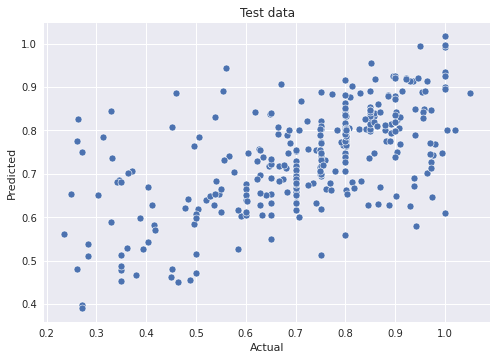

In [244]:
sns.scatterplot(data=test, x='Y2 test', y='Y2 Predicted test')
plt.title('Test data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

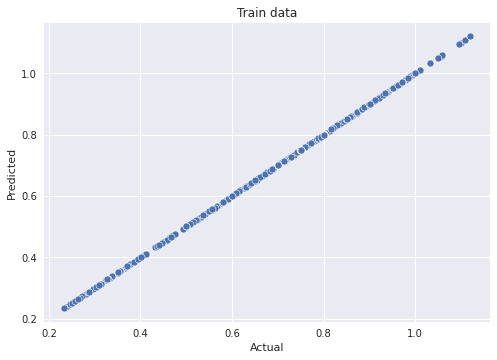

In [245]:
sns.scatterplot(data=train, x='Y2 train', y='Y2 Predicted train')
plt.title('Train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# **KneighborsRegressor Overfitted**

# **SVR**

In [246]:
y2_test_predict_svr = model_svr.predict(x2_test)
y2_train_predict_svr = model_svr.predict(x2_train)

In [247]:
test_svr = pd.DataFrame({'Y2 test':y2_test,'Y2 Predicted test':y2_test_predict_svr})
train_svr = pd.DataFrame({'Y2 train':y2_train,'Y2 Predicted train':y2_train_predict_svr})

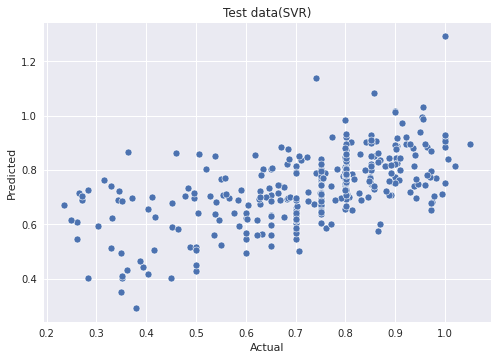

In [248]:
sns.scatterplot(data=test_svr, x='Y2 test', y='Y2 Predicted test')
plt.title('Test data(SVR)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

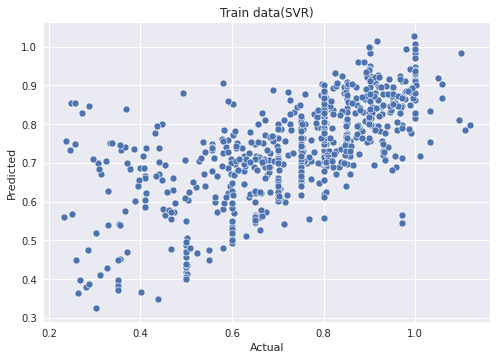

In [249]:
sns.scatterplot(data=train_svr, x='Y2 train', y='Y2 Predicted train')
plt.title('Train data(SVR)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [251]:
mean_squared_error(y2_test,y2_test_predict_svr)

0.020395036743216095

# **Using Ann**

In [253]:
model = keras.Sequential([
                          keras.layers.Dense(17, input_shape=(17,), activation='linear'),
                          keras.layers.Dense(1,activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [254]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
27/27 [==============================] - 0s 1ms/step - loss: 0.8635
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.1935
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.1054
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 8/100
27/27 [==============================] - 0s 981us/step - loss: 0.0264
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 10/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 11/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 12/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0246
Epoch 13/100
27/27 [===============

In [255]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 991us/step - loss: 0.0248


0.024807045236229897

In [261]:
y_pred_test = model.predict(x_test).flatten()
y_pred_train = model.predict(x_train).flatten()
test_ann = pd.DataFrame({'Y test':y_test, 'Y test predicted':y_pred_test.flatten()})
train_ann = pd.DataFrame({'Y train':y_train, 'Y train predicted':y_pred_train.flatten()})

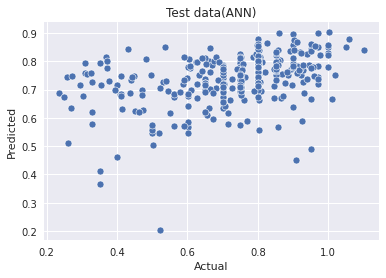

In [263]:
sns.scatterplot(data=test_ann, x='Y test', y='Y test predicted')
plt.title('Test data(ANN)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

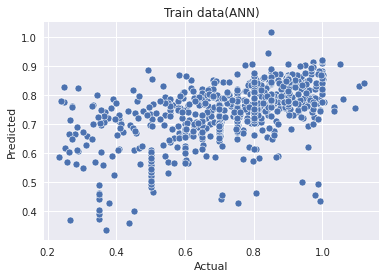

In [264]:
sns.scatterplot(data=train_ann, x='Y train', y='Y train predicted')
plt.title('Train data(ANN)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()